In [33]:
import numpy as np
import pandas as pd

In [34]:
churn = pd.read_csv('churn_data.csv'
                    , parse_dates=True)
churn.head()

,customer_id,date,transaction_amount,plan_type,churn,issuing_date
0,CUST_1,2023-01-01,193.524658,Basic,0,2021-03-01
1,CUST_1,2023-02-01,303.342657,Standard,0,2021-03-01
2,CUST_1,2023-03-01,38.460970,Standard,0,2021-03-01
3,CUST_1,2023-04-01,356.955563,Premium,0,2021-03-01
4,CUST_1,2023-05-01,417.896894,Standard,0,2021-03-01


In [35]:
customer_id_factor = pd.factorize(churn.customer_id)
churn['Customer_Id_No'] = customer_id_factor[0]

In [36]:
churn

,customer_id,date,transaction_amount,plan_type,churn,issuing_date,Customer_Id_No
0,CUST_1,2023-01-01,193.524658,Basic,0,2021-03-01,0
1,CUST_1,2023-02-01,303.342657,Standard,0,2021-03-01,0
2,CUST_1,2023-03-01,38.460970,Standard,0,2021-03-01,0
3,CUST_1,2023-04-01,356.955563,Premium,0,2021-03-01,0
4,CUST_1,2023-05-01,417.896894,Standard,0,2021-03-01,0
...,...,...,...,...,...,...,...
1195,CUST_100,2023-08-01,42.616717,Premium,0,2021-07-01,99
1196,CUST_100,2023-09-01,193.979775,Premium,0,2021-07-01,99
1197,CUST_100,2023-10-01,498.619353,Premium,0,2021-07-01,99
1198,CUST_100,2023-11-01,117.854550,Premium,0,2021-07-01,99


In [37]:
churn.plan_type.value_counts()

plan_type
Basic       420
Standard    399
Premium     380
Name: count, dtype: int64

In [38]:
plant_type_factor =  pd.factorize(churn.plan_type)
churn['plan_type_id'] =  plant_type_factor[0]

In [39]:
churn.issuing_date.unique()

array(['2021-03-01', '2018-03-01', '2020-09-01', '2018-07-01',
       '2018-06-01', '2020-10-01', '2021-12-01', '2018-05-01',
       '2022-08-01', '2023-01-01', '2020-03-01', '2020-12-01',
       '2021-01-01', '2022-03-01', '2018-01-01', '2019-06-01',
       '2018-12-01', '2019-07-01', '2019-05-01', '2018-08-01',
       '2020-11-01', '2019-10-01', '2022-05-01', '2022-04-01',
       '2018-02-01', '2022-09-01', '2021-06-01', '2022-07-01',
       '2019-09-01', '2022-11-01', '2018-04-01', '2020-08-01',
       '2019-03-01', '2018-10-01', '2019-01-01', '2020-07-01',
       '2022-02-01', '2019-11-01', '2019-02-01', '2021-11-01',
       '2021-07-01', '2019-08-01', '2020-01-01', '2022-01-01',
       '2019-04-01', '2021-09-01', '2022-10-01', '2021-04-01',
       '2021-10-01', '2018-09-01', '2022-12-01', '2020-06-01',
       '2020-04-01'], dtype=object)

In [40]:
churn.groupby( ['customer_id', 'plan_type'] ).issuing_date.unique()

customer_id  plan_type
CUST_1       Basic        [2021-03-01]
             Premium      [2021-03-01]
             Standard     [2021-03-01]
CUST_10      Basic        [2022-08-01]
             Premium      [2022-08-01]
                              ...     
CUST_98      Premium      [2018-08-01]
             Standard     [2018-08-01]
CUST_99      Basic        [2020-04-01]
             Premium      [2020-04-01]
             Standard     [2020-04-01]
Name: issuing_date, Length: 296, dtype: object

In [41]:
churn.issuing_date = pd.to_datetime(churn.issuing_date)
churn.date = pd.to_datetime(churn.date)
churn['no_days'] = churn.date-churn.issuing_date 
churn['no_days'] = churn.no_days.apply(lambda x: x.days)
churn

,customer_id,date,transaction_amount,plan_type,churn,issuing_date,Customer_Id_No,plan_type_id,no_days
0,CUST_1,2023-01-01,193.524658,Basic,0,2021-03-01,0,0,671
1,CUST_1,2023-02-01,303.342657,Standard,0,2021-03-01,0,1,702
2,CUST_1,2023-03-01,38.460970,Standard,0,2021-03-01,0,1,730
3,CUST_1,2023-04-01,356.955563,Premium,0,2021-03-01,0,2,761
4,CUST_1,2023-05-01,417.896894,Standard,0,2021-03-01,0,1,791
...,...,...,...,...,...,...,...,...,...
1195,CUST_100,2023-08-01,42.616717,Premium,0,2021-07-01,99,2,761
1196,CUST_100,2023-09-01,193.979775,Premium,0,2021-07-01,99,2,792
1197,CUST_100,2023-10-01,498.619353,Premium,0,2021-07-01,99,2,822
1198,CUST_100,2023-11-01,117.854550,Premium,0,2021-07-01,99,2,853


In [42]:
def create_embeding(ids, embeding_dims = 8, random = False, prefix=None):
    rows = len(set(churn.Customer_Id_No))
    
    if random:
        matrix = np.random.normal( size=(rows, embeding_dims) )
    else:
        matrix = np.arange(0, rows*embeding_dims).reshape(rows,embeding_dims)

    
    if prefix is not None:
        columns=list(map(lambda x: prefix+'V_'+str(x), range(embeding_dims))) 
    else:
        columns=list(map(lambda x: 'V_'+str(x), range(embeding_dims))) 
    

    matrix = pd.DataFrame(matrix[ids]
                          , columns=columns)
    
    
    return matrix

In [43]:
df_c_v = create_embeding(ids=churn.Customer_Id_No, prefix='Customer_', random=True)
df_c_v
df = pd.concat([churn, df_c_v], axis=1)
df

,customer_id,date,transaction_amount,plan_type,churn,issuing_date,Customer_Id_No,plan_type_id,no_days,Customer_V_0,Customer_V_1,Customer_V_2,Customer_V_3,Customer_V_4,Customer_V_5,Customer_V_6,Customer_V_7
0,CUST_1,2023-01-01,193.524658,Basic,0,2021-03-01,0,0,671,1.58632,1.479152,-0.861773,1.653902,0.122779,-1.270699,-0.123227,0.807289
1,CUST_1,2023-02-01,303.342657,Standard,0,2021-03-01,0,1,702,1.58632,1.479152,-0.861773,1.653902,0.122779,-1.270699,-0.123227,0.807289
2,CUST_1,2023-03-01,38.460970,Standard,0,2021-03-01,0,1,730,1.58632,1.479152,-0.861773,1.653902,0.122779,-1.270699,-0.123227,0.807289
3,CUST_1,2023-04-01,356.955563,Premium,0,2021-03-01,0,2,761,1.58632,1.479152,-0.861773,1.653902,0.122779,-1.270699,-0.123227,0.807289
4,CUST_1,2023-05-01,417.896894,Standard,0,2021-03-01,0,1,791,1.58632,1.479152,-0.861773,1.653902,0.122779,-1.270699,-0.123227,0.807289
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,CUST_100,2023-08-01,42.616717,Premium,0,2021-07-01,99,2,761,-1.25067,0.452656,1.530442,-0.016365,-0.077852,-0.090232,1.167340,0.409071
1196,CUST_100,2023-09-01,193.979775,Premium,0,2021-07-01,99,2,792,-1.25067,0.452656,1.530442,-0.016365,-0.077852,-0.090232,1.167340,0.409071
1197,CUST_100,2023-10-01,498.619353,Premium,0,2021-07-01,99,2,822,-1.25067,0.452656,1.530442,-0.016365,-0.077852,-0.090232,1.167340,0.409071
1198,CUST_100,2023-11-01,117.854550,Premium,0,2021-07-01,99,2,853,-1.25067,0.452656,1.530442,-0.016365,-0.077852,-0.090232,1.167340,0.409071


In [44]:
df_p_v = create_embeding(ids=churn.plan_type_id, prefix='Plan_Type_', random=True)
df = pd.concat([df, df_p_v], axis=1)
df

,customer_id,date,transaction_amount,plan_type,churn,issuing_date,Customer_Id_No,plan_type_id,no_days,Customer_V_0,...,Customer_V_6,Customer_V_7,Plan_Type_V_0,Plan_Type_V_1,Plan_Type_V_2,Plan_Type_V_3,Plan_Type_V_4,Plan_Type_V_5,Plan_Type_V_6,Plan_Type_V_7
0,CUST_1,2023-01-01,193.524658,Basic,0,2021-03-01,0,0,671,1.58632,...,-0.123227,0.807289,0.267755,-0.215322,0.718500,0.968603,0.109718,0.363292,-0.379275,0.766600
1,CUST_1,2023-02-01,303.342657,Standard,0,2021-03-01,0,1,702,1.58632,...,-0.123227,0.807289,0.149347,-0.024193,-2.005281,-0.179652,0.167348,-0.167017,2.145580,1.206233
2,CUST_1,2023-03-01,38.460970,Standard,0,2021-03-01,0,1,730,1.58632,...,-0.123227,0.807289,0.149347,-0.024193,-2.005281,-0.179652,0.167348,-0.167017,2.145580,1.206233
3,CUST_1,2023-04-01,356.955563,Premium,0,2021-03-01,0,2,761,1.58632,...,-0.123227,0.807289,0.947813,-0.531067,-0.273143,0.201821,0.004848,2.192388,0.109030,1.232086
4,CUST_1,2023-05-01,417.896894,Standard,0,2021-03-01,0,1,791,1.58632,...,-0.123227,0.807289,0.149347,-0.024193,-2.005281,-0.179652,0.167348,-0.167017,2.145580,1.206233
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,CUST_100,2023-08-01,42.616717,Premium,0,2021-07-01,99,2,761,-1.25067,...,1.167340,0.409071,0.947813,-0.531067,-0.273143,0.201821,0.004848,2.192388,0.109030,1.232086
1196,CUST_100,2023-09-01,193.979775,Premium,0,2021-07-01,99,2,792,-1.25067,...,1.167340,0.409071,0.947813,-0.531067,-0.273143,0.201821,0.004848,2.192388,0.109030,1.232086
1197,CUST_100,2023-10-01,498.619353,Premium,0,2021-07-01,99,2,822,-1.25067,...,1.167340,0.409071,0.947813,-0.531067,-0.273143,0.201821,0.004848,2.192388,0.109030,1.232086
1198,CUST_100,2023-11-01,117.854550,Premium,0,2021-07-01,99,2,853,-1.25067,...,1.167340,0.409071,0.947813,-0.531067,-0.273143,0.201821,0.004848,2.192388,0.109030,1.232086


In [45]:
df = df.drop( 'customer_id date plan_type issuing_date Customer_Id_No plan_type_id'.split(), axis=1 )
df

,transaction_amount,churn,no_days,Customer_V_0,Customer_V_1,Customer_V_2,Customer_V_3,Customer_V_4,Customer_V_5,Customer_V_6,Customer_V_7,Plan_Type_V_0,Plan_Type_V_1,Plan_Type_V_2,Plan_Type_V_3,Plan_Type_V_4,Plan_Type_V_5,Plan_Type_V_6,Plan_Type_V_7
0,193.524658,0,671,1.58632,1.479152,-0.861773,1.653902,0.122779,-1.270699,-0.123227,0.807289,0.267755,-0.215322,0.718500,0.968603,0.109718,0.363292,-0.379275,0.766600
1,303.342657,0,702,1.58632,1.479152,-0.861773,1.653902,0.122779,-1.270699,-0.123227,0.807289,0.149347,-0.024193,-2.005281,-0.179652,0.167348,-0.167017,2.145580,1.206233
2,38.460970,0,730,1.58632,1.479152,-0.861773,1.653902,0.122779,-1.270699,-0.123227,0.807289,0.149347,-0.024193,-2.005281,-0.179652,0.167348,-0.167017,2.145580,1.206233
3,356.955563,0,761,1.58632,1.479152,-0.861773,1.653902,0.122779,-1.270699,-0.123227,0.807289,0.947813,-0.531067,-0.273143,0.201821,0.004848,2.192388,0.109030,1.232086
4,417.896894,0,791,1.58632,1.479152,-0.861773,1.653902,0.122779,-1.270699,-0.123227,0.807289,0.149347,-0.024193,-2.005281,-0.179652,0.167348,-0.167017,2.145580,1.206233
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,42.616717,0,761,-1.25067,0.452656,1.530442,-0.016365,-0.077852,-0.090232,1.167340,0.409071,0.947813,-0.531067,-0.273143,0.201821,0.004848,2.192388,0.109030,1.232086
1196,193.979775,0,792,-1.25067,0.452656,1.530442,-0.016365,-0.077852,-0.090232,1.167340,0.409071,0.947813,-0.531067,-0.273143,0.201821,0.004848,2.192388,0.109030,1.232086
1197,498.619353,0,822,-1.25067,0.452656,1.530442,-0.016365,-0.077852,-0.090232,1.167340,0.409071,0.947813,-0.531067,-0.273143,0.201821,0.004848,2.192388,0.109030,1.232086
1198,117.854550,0,853,-1.25067,0.452656,1.530442,-0.016365,-0.077852,-0.090232,1.167340,0.409071,0.947813,-0.531067,-0.273143,0.201821,0.004848,2.192388,0.109030,1.232086


In [46]:
df.isna().mean() 

transaction_amount    0.005833
churn                 0.000000
no_days               0.000000
Customer_V_0          0.000000
Customer_V_1          0.000000
Customer_V_2          0.000000
Customer_V_3          0.000000
Customer_V_4          0.000000
Customer_V_5          0.000000
Customer_V_6          0.000000
Customer_V_7          0.000000
Plan_Type_V_0         0.000000
Plan_Type_V_1         0.000000
Plan_Type_V_2         0.000000
Plan_Type_V_3         0.000000
Plan_Type_V_4         0.000000
Plan_Type_V_5         0.000000
Plan_Type_V_6         0.000000
Plan_Type_V_7         0.000000
dtype: float64

In [47]:
df.churn.value_counts()

churn
0    863
1    337
Name: count, dtype: int64

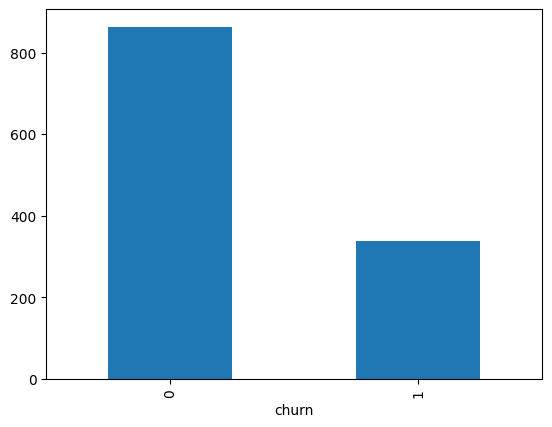

In [48]:
df.churn.value_counts().plot.bar();

<Axes: ylabel='Frequency'>

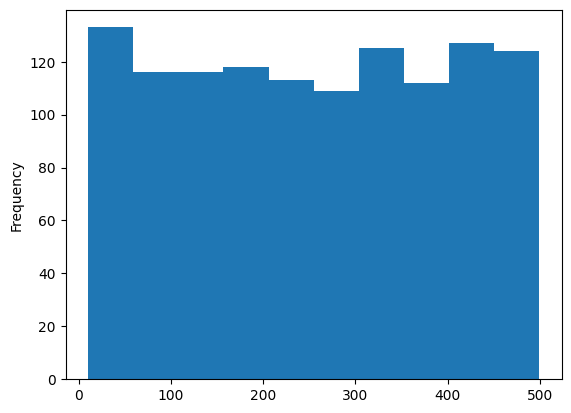

In [49]:
df.transaction_amount.plot.hist()

In [50]:
df

,transaction_amount,churn,no_days,Customer_V_0,Customer_V_1,Customer_V_2,Customer_V_3,Customer_V_4,Customer_V_5,Customer_V_6,Customer_V_7,Plan_Type_V_0,Plan_Type_V_1,Plan_Type_V_2,Plan_Type_V_3,Plan_Type_V_4,Plan_Type_V_5,Plan_Type_V_6,Plan_Type_V_7
0,193.524658,0,671,1.58632,1.479152,-0.861773,1.653902,0.122779,-1.270699,-0.123227,0.807289,0.267755,-0.215322,0.718500,0.968603,0.109718,0.363292,-0.379275,0.766600
1,303.342657,0,702,1.58632,1.479152,-0.861773,1.653902,0.122779,-1.270699,-0.123227,0.807289,0.149347,-0.024193,-2.005281,-0.179652,0.167348,-0.167017,2.145580,1.206233
2,38.460970,0,730,1.58632,1.479152,-0.861773,1.653902,0.122779,-1.270699,-0.123227,0.807289,0.149347,-0.024193,-2.005281,-0.179652,0.167348,-0.167017,2.145580,1.206233
3,356.955563,0,761,1.58632,1.479152,-0.861773,1.653902,0.122779,-1.270699,-0.123227,0.807289,0.947813,-0.531067,-0.273143,0.201821,0.004848,2.192388,0.109030,1.232086
4,417.896894,0,791,1.58632,1.479152,-0.861773,1.653902,0.122779,-1.270699,-0.123227,0.807289,0.149347,-0.024193,-2.005281,-0.179652,0.167348,-0.167017,2.145580,1.206233
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,42.616717,0,761,-1.25067,0.452656,1.530442,-0.016365,-0.077852,-0.090232,1.167340,0.409071,0.947813,-0.531067,-0.273143,0.201821,0.004848,2.192388,0.109030,1.232086
1196,193.979775,0,792,-1.25067,0.452656,1.530442,-0.016365,-0.077852,-0.090232,1.167340,0.409071,0.947813,-0.531067,-0.273143,0.201821,0.004848,2.192388,0.109030,1.232086
1197,498.619353,0,822,-1.25067,0.452656,1.530442,-0.016365,-0.077852,-0.090232,1.167340,0.409071,0.947813,-0.531067,-0.273143,0.201821,0.004848,2.192388,0.109030,1.232086
1198,117.854550,0,853,-1.25067,0.452656,1.530442,-0.016365,-0.077852,-0.090232,1.167340,0.409071,0.947813,-0.531067,-0.273143,0.201821,0.004848,2.192388,0.109030,1.232086


In [51]:
X = df.drop('churn', axis=1)
y = df.churn

In [52]:
from sklearn.impute import KNNImputer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.metrics import silhouette_score, classification_report
from sklearn.cluster import KMeans

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [54]:
X_test

,transaction_amount,no_days,Customer_V_0,Customer_V_1,Customer_V_2,Customer_V_3,Customer_V_4,Customer_V_5,Customer_V_6,Customer_V_7,Plan_Type_V_0,Plan_Type_V_1,Plan_Type_V_2,Plan_Type_V_3,Plan_Type_V_4,Plan_Type_V_5,Plan_Type_V_6,Plan_Type_V_7
944,389.919614,1673,-1.769992,-1.191255,-1.078762,1.609208,2.078567,-0.981224,-1.720257,0.073836,0.149347,-0.024193,-2.005281,-0.179652,0.167348,-0.167017,2.145580,1.206233
813,447.228224,1491,-0.644577,1.495581,-0.079163,-0.446330,-1.065825,0.036626,0.771962,-0.359681,0.947813,-0.531067,-0.273143,0.201821,0.004848,2.192388,0.109030,1.232086
787,230.671980,1583,-1.497787,1.595581,0.011146,-1.080280,0.245374,-0.626769,-1.936601,0.111275,0.267755,-0.215322,0.718500,0.968603,0.109718,0.363292,-0.379275,0.766600
677,432.071298,1400,1.436998,-0.338863,-1.579226,1.355865,-1.004548,0.722605,0.440860,-2.059905,0.149347,-0.024193,-2.005281,-0.179652,0.167348,-0.167017,2.145580,1.206233
1039,381.800364,487,0.635840,0.530808,0.409519,0.003027,0.708682,0.046032,1.357814,-0.104405,0.149347,-0.024193,-2.005281,-0.179652,0.167348,-0.167017,2.145580,1.206233
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
481,409.264306,1492,1.289610,0.988579,-0.225062,-0.386592,-1.590764,-0.329435,-0.665709,0.679764,0.149347,-0.024193,-2.005281,-0.179652,0.167348,-0.167017,2.145580,1.206233
654,371.342547,607,0.414330,0.476605,-0.960148,-0.980568,1.517106,0.440975,-1.170355,1.191532,0.267755,-0.215322,0.718500,0.968603,0.109718,0.363292,-0.379275,0.766600
5,NaN,822,1.586320,1.479152,-0.861773,1.653902,0.122779,-1.270699,-0.123227,0.807289,0.947813,-0.531067,-0.273143,0.201821,0.004848,2.192388,0.109030,1.232086
705,305.708957,1430,-1.633453,-1.039201,0.035402,0.480494,0.358640,0.612565,-0.322477,1.082115,0.149347,-0.024193,-2.005281,-0.179652,0.167348,-0.167017,2.145580,1.206233


In [55]:
def find_optimal_clusters(df, algorithm=KMeans(), max_clusters=10):
    """
    Determine the optimal number of clusters using the Silhouette Score.

    Parameters:
        df (pd.DataFrame): Input dataset.
        algorithm (sklearn.cluster.BaseEstimator): Clustering algorithm to use. Defaults to KMeans().
        max_clusters (int, optional): Maximum number of clusters to consider. Defaults to 10.

    Returns:
        int: Optimal number of clusters for the given dataset.
    """

    # Initialize the optimal score and the optimal number of clusters
    best_score = -1
    optimal_n_clusters = None

    # Try out all possible numbers of clusters from 2 to max_clusters
    for n_clusters in range(2, max_clusters + 1):
        algorithm.n_clusters = n_clusters
        labels = algorithm.fit_predict(df)
        score = silhouette_score(df, labels)

        # Update the optimal score and the optimal number of clusters if necessary
        if score > best_score:
            best_score = score
            optimal_n_clusters = n_clusters

    return optimal_n_clusters

In [56]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
imputer = KNNImputer()
X_train_scaled = imputer.fit_transform(X_train_scaled)
find_optimal_clusters(df=X_train_scaled)

3

In [57]:
pipe_clustering = Pipeline(steps=[
    ( 'scaler', StandardScaler() )
    , ('imputer', KNNImputer())
    , ('kmeans', KMeans(n_clusters=3))

])

In [58]:
X_train['cluster'] = pipe_clustering.fit_predict(X_train)
X_test['cluster'] = pipe_clustering.predict(X_test)

In [59]:
pipe = Pipeline(steps=[
    ( 'scaler', StandardScaler() )
    , ('imputer', KNNImputer())
    , ('estimator', RandomForestClassifier(n_estimators=1000))

])

In [60]:
precision_score = cross_validate(estimator=pipe, X=X_train, y=y_train,cv=10, n_jobs=-1, scoring='precision')
recall_score = cross_validate(estimator=pipe, X=X_train, y=y_train,cv=10, n_jobs=-1, scoring='recall')

In [61]:
precision_score['test_score'].mean(), recall_score['test_score'].mean()
# (np.float64(0.8077744423598082), np.float64(0.7422322775263952)) non random embeding
# (np.float64(0.7934519262250355), np.float64(0.7591020408163265)) random embeding

(np.float64(0.8311711702146484), np.float64(0.8008547008547009))

In [62]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('imputer', KNNImputer()),
                ('estimator', RandomForestClassifier(n_estimators=1000))])

In [63]:
y_pred = pipe.predict(X_test)

In [64]:
print(classification_report(y_true=y_test, y_pred=y_pred))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94       224
           1       0.82      0.83      0.82        76

    accuracy                           0.91       300
   macro avg       0.88      0.88      0.88       300
weighted avg       0.91      0.91      0.91       300

